# Implementation of Classical Logic Gates using Quantum Gate Model

## Classical logic gates

In classical computation one often used model is Boolean logic or classical logical gates. Such gates represent Boolean functions, functions with only binary (0,1) input and output. One interesting aspect of Boolean logic is, that all possible binary functions can be formed by only using a combination of only a small number of different logic gates. Such sets are called functionally complete sets. One famous such set is AND and NOT. These two gates are enough to express all possible functions. The same is true for OR and NOT. There exists smaller sets, such as the NAND and NOR which alone are universal, nevertheless the functions AND, NOT and OR are often seen as the basic blocks of classical computation.


In [108]:


# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from matplotlib import style
style.use('bmh')
style.use('dark_background')

# Useful to have pi
import math
pi=math.pi

## *Before we move on with this, keep in mind that all the quantum bits are initalized to $|0\rangle$ state*

## What are quantum circuits?

Quantum circuits are models for quantum computation in which a computation is a sequence of quantum gates. Quantum gates often represent rotations on the Bloch sphere. Let's take a look at some of the popular quantum gates.

### X gate 

The X-gate is represented by the Pauli-X matrix: 

$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$

An X gate equates to a rotation around the X-axis of the Bloch sphere by $\pi$ radians. It maps $|0\rangle$ to $|1\rangle$ and $|1\rangle$ to $|0\rangle$. It is the quantum equivalent of the NOT gate for classical computers and is sometimes called a bit-flip.

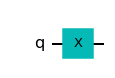

In [109]:
x_gate=QuantumCircuit(1) # Create a quantum circuit with 1 qubit
x_gate.x(0)
x_gate.draw(output='mpl')

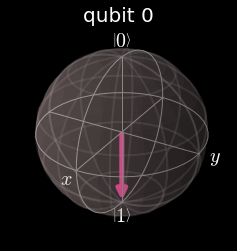

In [110]:
backend = Aer.get_backend('statevector_simulator')
result = execute(x_gate, backend).result().get_statevector()
plot_bloch_multivector(result)

### CX gate (CNOT gate)

The controlled NOT (or CNOT or CX) gate acts on two qubits. It performs the NOT operation (equivalent to applying an X gate) on the second qubit only when the first qubit is $|1\rangle$ and otherwise leaves it unchanged. 

Note: Qiskit numbers the bits in a string from right to left.

$CX = \begin{pmatrix}
1 & 0 & 0 & 0  \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{pmatrix}$

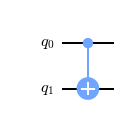

In [111]:
cx_gate = QuantumCircuit(2)
cx_gate.cx(0,1)
cx_gate.draw(output='mpl')

### CCX gate (Toffoli gate)

The CCX gate (controlled controlled X Gate) is also called a Toffoli gate. The CCX gate is a three-bit gate, with two controls and one target as their input and output. If the first two bits are in the state $|1\rangle$, it applies a Pauli-X (or NOT) on the third bit. Otherwise, it does nothing. 

Note: Qiskit numbers the bits in a string from right to left.

$CCX = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
\end{pmatrix}$

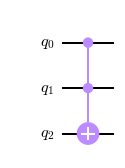

In [112]:
ccx_gate = QuantumCircuit(3)
ccx_gate.ccx(0,1,2)
ccx_gate.draw(output='mpl')

## Create logical gates with the help of quantum gates

### NOT gate

The NOT gate flips the value of a bit and, as was mentioned before, an X gate can be considered a NOT gate. The truth table for a NOT gate looks like this:

| Input | Output |
| --- | --- | 
| 1 | 0 |
| 0 | 1 |

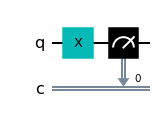

In [113]:
not_gate=QuantumCircuit(1,1) # Create a quantum circuit with 1 qubit and 1 classical bit
not_gate.x(0)
not_gate.measure(0,0)
not_gate.draw(output='mpl')

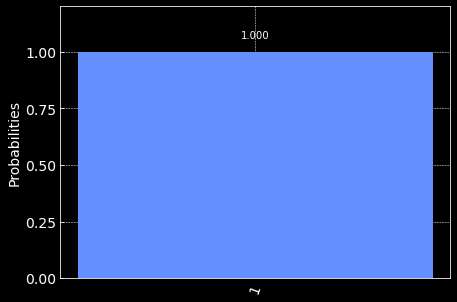

In [114]:
backend = Aer.get_backend('qasm_simulator')
result = execute(not_gate,backend).result()
count = result.get_counts(not_gate)
plot_histogram(count)

### AND gate

The output of an AND is true if and only if both inputs are true. The truth table for an AND Gate looks like this:

| A (Input) | B (Input) | Output |
| --- | --- | --- |
| 0 | 0 | 0 | 
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

With a Toffoli gate, we can get the result of an AND gate by interpreting the two control bits as the input bits and the target bit as the output bit.

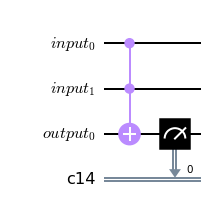

In [115]:
inputs = QuantumRegister(2,name = 'input')
output = QuantumRegister(1,name='output')
out = ClassicalRegister(1)
and_gate=QuantumCircuit(inputs,output,out)
# and_gate.x([0,1])# Create a quantum circuit with 3 qubits and 1 classical bit
and_gate.ccx(0,1,2)
and_gate.measure(2,0)
and_gate.draw(output='mpl')

In [116]:
backend = Aer.get_backend('qasm_simulator')
result = execute(and_gate,backend).result()
count = result.get_counts(and_gate)
print(count)

{'0': 1024}


## Here, we'll show you one of the advantages Quantum Gates have over classical Gates:
#### 1) Quantum Gates can return back their exact input without any other input set as we do in classical logic gates to determine the other input. 
##### The reason being Quantum Gates are reversible i.e. if you apply the gates again, you'll get the input back. This, in classical is true for only one gate which is the NOT Gate. With other gates, we don't see this happening.

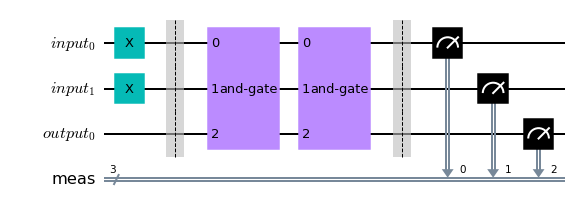

In [117]:
andd_gate = and_gate.remove_final_measurements(inplace=False)
andd = andd_gate.to_gate(label='and-gate')
inputs = QuantumRegister(2,name = 'input')
output = QuantumRegister(1,name='output')
gate1 = QuantumCircuit(inputs,output)
gate1.x([0,1])
gate1.barrier()
gate1.append(andd,[0,1,2])
gate1.append(andd,[0,1,2])
gate1.measure_all()
gate1.draw('mpl')

In [118]:
backend = Aer.get_backend('qasm_simulator')
result = execute(gate1,backend).result()
count = result.get_counts(gate1)
print(count)

{'011': 1024}


#### As you can see from the output, it returned the inputs which we gave to the circuit. Therefore, it proves what we said earlier.

### OR gate

An OR gate returns true if at least one of the input gates is true.
The truth table for an OR Gate looks like this:

| A (Input) | B (Input) | Output |
| --- | --- | --- |
| 0 | 0 | 0 | 
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 1 |

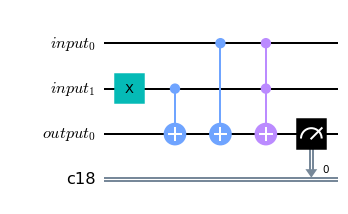

In [134]:
inputs = QuantumRegister(2,name = 'input')
output = QuantumRegister(1,name='output')
out = ClassicalRegister(1)
or_gate=QuantumCircuit(inputs,output,out) # Create a quantum circuit with 3 qubits and 1 classical bit
# or_gate.x(0)
or_gate.x(1)
or_gate.cx(1,2)
or_gate.cx(0,2)
or_gate.ccx(0,1,2)
or_gate.measure(2,0)
or_gate.draw(output='mpl')

In [120]:
backend = Aer.get_backend('qasm_simulator')
result = execute(or_gate,backend).result()
count = result.get_counts(or_gate)
# plot_histogram(count)
print(count)

{'1': 1024}


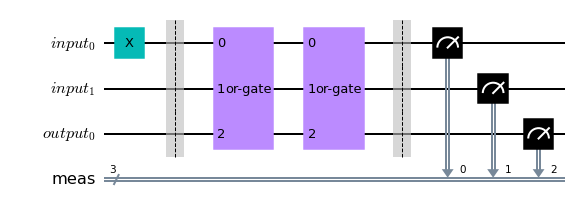

In [121]:
orr_gate = or_gate.remove_final_measurements(inplace=False)
orr = orr_gate.to_gate(label='or-gate')
inputs = QuantumRegister(2,name = 'input')
output = QuantumRegister(1,name='output')
gate1 = QuantumCircuit(inputs,output)
gate1.x(0)
gate1.barrier()
# gate1.x(1)
gate1.append(orr,[0,1,2])
gate1.append(orr,[0,1,2])
gate1.measure_all()
gate1.draw('mpl')

In [122]:
backend = Aer.get_backend('qasm_simulator')
result = execute(gate1,backend).result()
count = result.get_counts(gate1)
print(count)

{'001': 1024}


### NOR gate

An NOR gate returns false if at least one of the input gates is true.
The truth table for an OR Gate looks like this:

| A (Input) | B (Input) | Output |
| --- | --- | --- |
| 0 | 0 | 1 | 
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 0 |

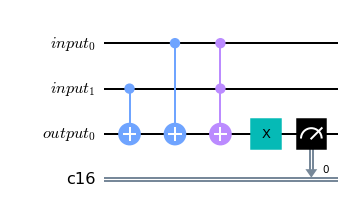

In [123]:
inputs = QuantumRegister(2,name = 'input')
output = QuantumRegister(1,name='output')
out = ClassicalRegister(1)
nor_gate=QuantumCircuit(inputs,output,out)
# nor_gate.x([0,1])  # Create a quantum circuit with 3 qubits and 1 classical bit
nor_gate.cx(1,2)
nor_gate.cx(0,2)
nor_gate.ccx(0,1,2)
nor_gate.x(2)
nor_gate.measure(2,0)
nor_gate.draw(output='mpl')

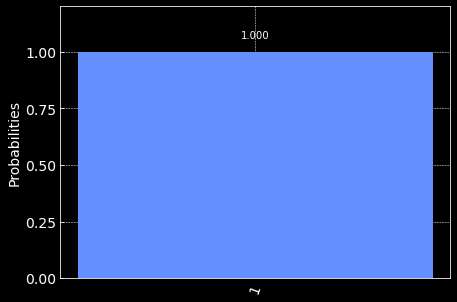

In [124]:
backend = Aer.get_backend('qasm_simulator')
result = execute(nor_gate,backend).result()
count = result.get_counts(nor_gate)
plot_histogram(count)

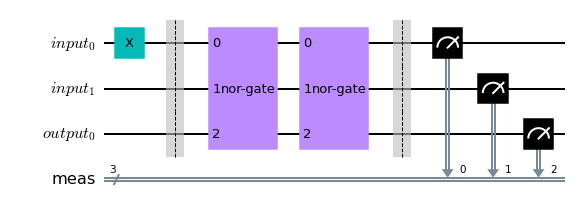

In [125]:
norr_gate = nor_gate.remove_final_measurements(inplace=False)
norr = norr_gate.to_gate(label='nor-gate')
inputs = QuantumRegister(2,name = 'input')
output = QuantumRegister(1,name='output')
gate1 = QuantumCircuit(inputs,output)
gate1.x(0)
gate1.barrier()
# gate1.x(1)
gate1.append(norr,[0,1,2])
gate1.append(norr,[0,1,2])
gate1.measure_all()
gate1.draw('mpl')

In [126]:
backend = Aer.get_backend('qasm_simulator')
result = execute(gate1,backend).result()
count = result.get_counts(gate1)
print(count)

{'001': 1024}


### NAND gate

The output of an AND is true if and only if both inputs are true. The truth table for an AND Gate looks like this:

| A (Input) | B (Input) | Output |
| --- | --- | --- |
| 0 | 0 | 1 | 
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

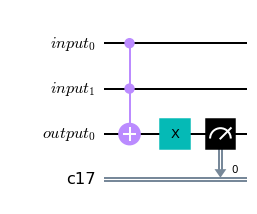

In [127]:
inputs = QuantumRegister(2,name = 'input')
output = QuantumRegister(1,name='output')
out = ClassicalRegister(1)
nand_gate=QuantumCircuit(inputs,output,out) # Create a quantum circuit with 3 qubits and 1 classical bit
# nand_gate.x([0,1])
nand_gate.ccx(0,1,2)
nand_gate.x(2)
nand_gate.measure(2,0)
nand_gate.draw(output='mpl')

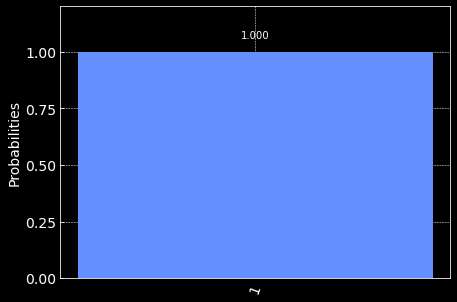

In [128]:
backend = Aer.get_backend('qasm_simulator')
result = execute(nand_gate,backend).result()
count = result.get_counts(nand_gate)
plot_histogram(count)

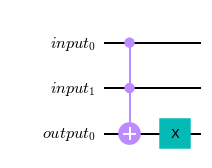

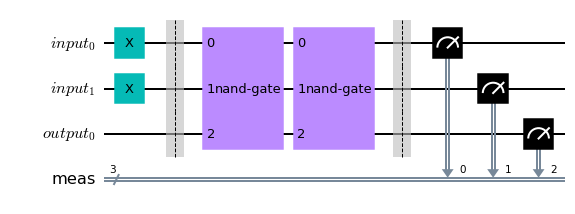

In [129]:
nandd_gate = nand_gate.remove_final_measurements(inplace=False)
display(nandd_gate.draw('mpl'))
nandd = nandd_gate.to_gate(label='nand-gate')
inputs = QuantumRegister(2,name = 'input')
output = QuantumRegister(1,name='output')
gate1 = QuantumCircuit(inputs,output)
gate1.x(0)
gate1.x(1)
gate1.barrier()

gate1.append(nandd,[0,1,2])
gate1.append(nandd,[0,1,2])
gate1.measure_all()
gate1.draw('mpl')

In [130]:
backend = Aer.get_backend('qasm_simulator')
result = execute(gate1,backend).result()
count = result.get_counts(gate1)
print(count)

{'011': 1024}
